In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

from math import floor

In [2]:
### Hyper_parameters

In [3]:
# Set some parameters
img_size = 128  # 384
img_channels = 3
batch_size = 20

path = "./dataset/ISIC2018_Task1-2_Training_Data/"
train_path = "./dataset/ISIC2018_Task1-2_Training_Data/images" # Training set path

## Training Ids
train_ids = []
for files in os.walk(train_path):  # Traverse directory
       for name in files:
              train_ids.append(name)

train_ids = train_ids[2]  # Get file name
train_ids = [i.split('.', 1)[0] for i in train_ids]  # remove .jpg suffix

# split whole train id into train, validate and test which follows 0.8, 0.1, 0.1 ratio
val_data_size = floor(len(train_ids) * 0.2)  # Validation set size
test_data_size = floor(val_data_size * 0.5)  # test set size

valid_test_ids = train_ids[:val_data_size]
test_ids = valid_test_ids[:test_data_size]
valid_ids = valid_test_ids[test_data_size:]

train_ids = train_ids[val_data_size:]  # Data is divided into 3 parts

In [4]:
ids=valid_ids + train_ids + test_ids
print("No. of images = ", len(ids))

print("length of train_set = ", len(train_ids))
print("length of validation_set = ", len(valid_ids))
print("length of test_set = ", len(test_ids))

No. of images =  2594
length of train_set =  2076
length of validation_set =  259
length of test_set =  259


In [5]:
from data_generator import DataGenerator

In [6]:
test_generator = DataGenerator(test_ids, path, batch_size=batch_size, img_size=img_size)

# Read training pictures
x, y = test_generator.__getitem__(0)
print("first image shape: ", x.shape, y.shape)

first image shape:  (20, 128, 128, 3) (20, 128, 128, 1)


### Verify whether the image is successfully read

In [ ]:
n = random.randint(0, len(x) - 1) # Random number within the number of pictures
print("random number: ", n)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # Adjust the page layout
ax = fig.add_subplot(1, 2, 1) # the first plot
ax.imshow(x[n])
ax = fig.add_subplot(1, 2, 2) # the sec plot
ax.imshow(np.reshape(y[n], (img_size, img_size)), cmap="gray")

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
import tensorflow_addons
model_improved = tf.keras.models.load_model('u_net_model_improved.h5',custom_objects={'InstanceNormalization':tensorflow_addons.layers.InstanceNormalization, 'dice_coef': dice_coef})

In [ ]:
model_basic = tf.keras.models.load_model('basic_u_net_model.h5', custom_objects={'InstanceNormalization':tensorflow_addons.layers.InstanceNormalization, 'dice_coef': dice_coef})

In [ ]:
score = model_improved.evaluate(test_generator)
print(score)

In [ ]:
score = model_basic.evaluate(test_generator)
print(score)

random number:  5


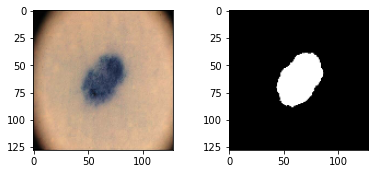

In [7]:
score = model_basic.evaluate(test_generator)
print(score)

In [8]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [9]:
import tensorflow_addons
model_improved = tf.keras.models.load_model('u_net_model_improved.h5',custom_objects={'InstanceNormalization':tensorflow_addons.layers.InstanceNormalization, 'dice_coef': dice_coef})

In [10]:
model_basic = tf.keras.models.load_model('basic_u_net_model.h5', custom_objects={'InstanceNormalization':tensorflow_addons.layers.InstanceNormalization, 'dice_coef': dice_coef})

In [11]:
score = model_improved.evaluate(test_generator)
print(score)

13/13 [==============================] - 8s 590ms/step - loss: 0.2632 - dice_coef: 0.8289 - accuracy: 0.8976
[0.2631937861442566, 0.8288717865943909, 0.8975608348846436]


In [12]:
score = model_basic.evaluate(test_generator)
print(score)

14/14 [==============================] - 5s 332ms/step - loss: 0.1769 - dice_coef: 0.8248 - accuracy: 0.9282
[0.1769377440214157, 0.8248308300971985, 0.9281663298606873]
